## 1. Panorama general
#####  **Objetivo**: Crear una herramienta que permita realizar una estimación de casos positivos y número de muertes en una determinada fecha.
##### **Metodología**: El enfoque a usar será el de aprendizaje supervisado. Se separarán los conjuntos de entrenamiento y de prueba en base a la fecha de los registros.

##### **Online**: Porque la data se toma directamente del repositorio, que se actualiza cada cierto tiempo.



## 2. Datos
##### Datos proporcionados contienen información histórica desde el 06-03-2020 hasta el 17-10-2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import *

data = pd.read_csv(
    'https://raw.githubusercontent.com/jmcastagnetto/covid-19-peru-data/main/datos/covid-19-peru-data.csv',
    sep = ',',
    header = 0
)


## 3. Explorar los datos

In [ ]:
pd.set_option('max_columns', 10)
pd.set_option('display.width', 150)
pd.options.display.float_format = '{:,.3f}'.format
data_exploration = data.copy()
print(data_exploration.info())
# Podemos descartar las columnas que tienen la menor cantidad de non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        5612 non-null   object 
 1   iso3c                          5612 non-null   object 
 2   region                         5385 non-null   object 
 3   date                           5612 non-null   object 
 4   confirmed                      5456 non-null   float64
 5   deaths                         4858 non-null   float64
 6   recovered                      245 non-null    float64
 7   total_tests                    4321 non-null   float64
 8   negative_tests                 4353 non-null   float64
 9   pcr_test_positive              4965 non-null   float64
 10  serological_test_positive      4901 non-null   float64
 11  pcr_serological_test_positive  24 non-null     float64
dtypes: float64(8), object(4)
memory usage: 526.2+ KB

        confirmed     deaths   recovered   total_tests  negative_tests  pcr_test_positive  serological_test_positive  pcr_serological_test_positive
count   5,456.000  4,858.000     245.000     4,321.000       4,353.000          4,965.000                  4,901.000                         24.000
mean   27,142.969  1,226.346 223,815.449   178,890.023     143,763.193          7,186.165                 22,377.553                         34.583
std    95,701.768  4,150.652 246,506.639   534,596.049     427,699.351         25,674.309                 73,538.358                         72.926
min         1.000      1.000       1.000     3,250.000    -276,758.000              1.000                      1.000                          1.000
25%       595.250     27.000   6,811.000    23,249.000      19,356.000            175.000                    928.000                          1.750
50%     4,779.500    194.000 135,520.000    45,395.000      36,783.000            884.000                  4,998

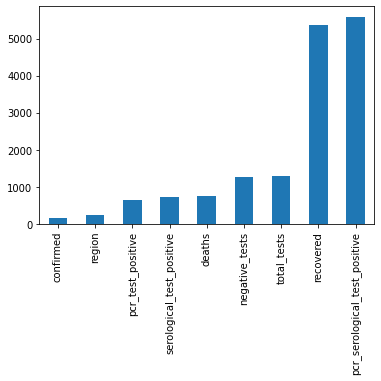

In [ ]:
print(data.describe())

print('Datos con mayor cantidad de null')
null_features = data_exploration.isnull().sum()
null_features = null_features[null_features > 0]
null_features.sort_values(inplace=True)
null_features.plot.bar()

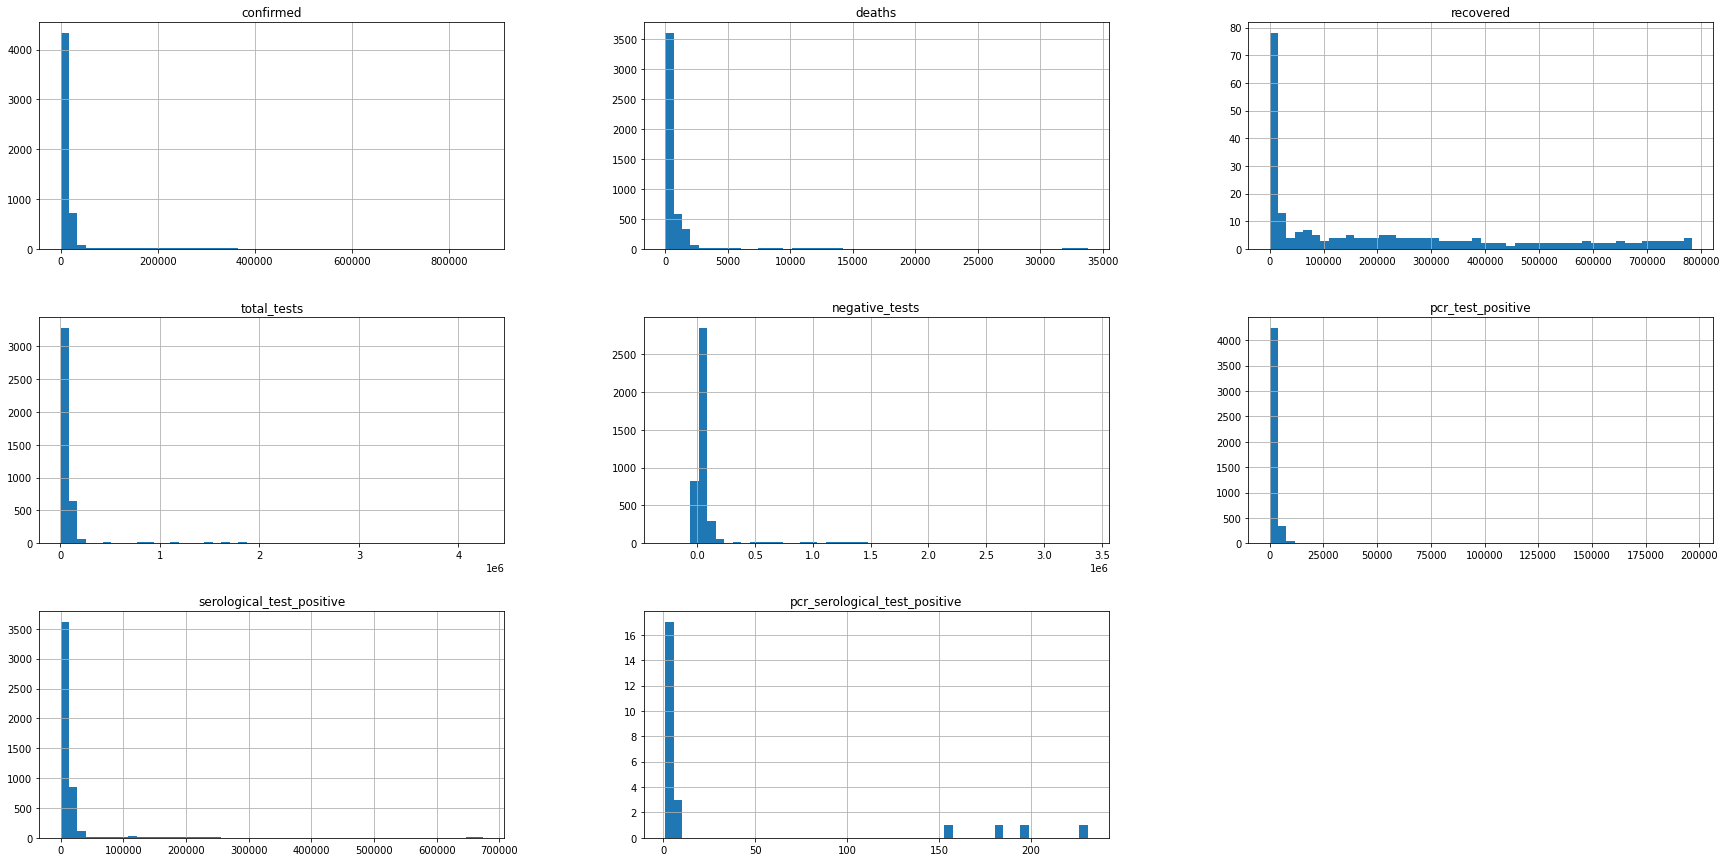

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data_exploration.hist(bins=50, figsize=(30,15))
# Refleja la distribución obtenida anteriormente
plt.show()

In [ ]:
# Correlacion variables
from scipy import stats

# convertir date a int
data_exploration = data.copy()
data_exploration['date'] = pd.to_datetime(data_exploration['date']).astype(int)/ 10**9
data_exploration.fillna(0, inplace=True)

confirmed = data_exploration.confirmed.values
deaths = data_exploration.deaths.values
date = data_exploration.date.values
total_tests = data_exploration.total_tests.values


print('Date y confirmed:', stats.pearsonr(date, confirmed)[0])
print('Date y deaths:', stats.pearsonr(date, deaths)[0])

print('Deaths y confirmed: ', stats.pearsonr(deaths, confirmed)[0])

print('Deaths y total_tests: ', stats.pearsonr(total_tests, deaths)[0])
print('Confirmed y total_tests: ', stats.pearsonr(total_tests, confirmed)[0])

Date y confirmed: 0.21669766525596829
Date y deaths: 0.2249256776835063
Deaths y confirmed:  0.9922227623662132
Deaths y total_tests:  0.9833160442092029
Confirmed y total_tests:  0.9929222771156285


## 4. Preparar los datos

In [ ]:
# FUNCIONES
def Normalizar_Datos(array):
    p = np.mean(array, axis=0)
    d = np.std(array, axis=0)
    for i in range(0, array.shape[0]):
        array[i] = np.true_divide((array[i] - p), d)
    return array, p, d

def Convertir_fecha(df):
    start_date = datetime.date(2020, 3, 6)
    for i, row in df.iterrows():
        year = int(df.at[i, 'date'][0:4])
        month = int(df.at[i, 'date'][5:7])
        day = int(df.at[i, 'date'][8:10])
        temp_date = datetime.date(year, month, day)
        df.at[i,'date'] = np.float64((temp_date - start_date).days)
    return df


In [ ]:
new_data = data.copy()
# print(data.count())
# filas con valores no nan en 'recovered' = 244
# filas con valores no nan en 'pcr_serological_test_positive' = 24
# iso3c en todas las filas es PER
# country es peru en todas las filas
del new_data['recovered']
del new_data['pcr_serological_test_positive']
del new_data['iso3c']
del new_data['country']

new_data.fillna(0, inplace=True)
new_data = Convertir_fecha(new_data)

# dataset arequipa
df_arequipa = new_data.copy()
df_arequipa = df_arequipa.loc[df_arequipa['region'] == 'Arequipa']
print(df_arequipa)
del df_arequipa['region']
del df_arequipa['pcr_test_positive']

# dataset peru
df_peru = new_data.copy()
df_peru = df_peru.loc[df_peru['region'] == 0]
print(df_peru)
del df_peru['region']
del df_peru['pcr_test_positive']



        region date  ...  pcr_test_positive  serological_test_positive
6     Arequipa    7  ...                0.0                        0.0
12    Arequipa    8  ...                0.0                        0.0
19    Arequipa    9  ...                0.0                        0.0
30    Arequipa   10  ...                0.0                        0.0
41    Arequipa   11  ...                0.0                        0.0
...        ...  ...  ...                ...                        ...
5561  Arequipa  226  ...             5543.0                    37957.0
5588  Arequipa  227  ...             5557.0                    37972.0
5615  Arequipa  228  ...             5617.0                    38029.0
5642  Arequipa  229  ...             5655.0                    38090.0
5669  Arequipa  230  ...             5678.0                    38133.0

[224 rows x 8 columns]
     region date  ...  pcr_test_positive  serological_test_positive
0         0    0  ...                0.0                

In [ ]:
data_arequipa, arequipa_mean, arequipa_std = Normalizar_Datos(np.array(df_arequipa.values, dtype=np.float64))

y_arequipa_confirmados = data_arequipa[:,1]
x_arequipa_confirmados = np.delete(data_arequipa, 1, axis=1)

y_arequipa_muertes = data_arequipa[:,2]
x_arequipa_muertes = np.delete(data_arequipa, 2, axis=1)

# Agregar columna de unos
x_arequipa_confirmados = np.insert(x_arequipa_confirmados, 0, 1, axis=1) 
x_arequipa_muertes = np.insert(x_arequipa_muertes, 0, 1, axis=1)

limit = int(0.7 * len(x_arequipa_confirmados))

x_aqp_confirmados_train, x_aqp_confirmados_test = x_arequipa_confirmados[:limit,:], x_arequipa_confirmados[limit:, :]
y_aqp_confirmados_train, y_aqp_confirmados_test = y_arequipa_confirmados[:limit], y_arequipa_confirmados[limit:]

y_aqp_confirmados_train = np.array([[x] for x in y_aqp_confirmados_train])
y_aqp_confirmados_test = np.array([[x] for x in y_aqp_confirmados_test])

x_aqp_muertes_train, x_aqp_muertes_test = x_arequipa_muertes[:limit,:], x_arequipa_muertes[limit:, :]
y_aqp_muertes_train, y_aqp_muertes_test = y_arequipa_muertes[:limit], y_arequipa_muertes[limit:]

y_aqp_muertes_train = np.array([[x] for x in y_aqp_muertes_train])
y_aqp_muertes_test = np.array([[x] for x in y_aqp_muertes_test])


In [ ]:
data_peru, peru_mean, peru_std = Normalizar_Datos(np.array(df_peru.values, dtype=np.float64))

y_peru_confirmados = data_peru[:,1]
x_peru_confirmados = np.delete(data_peru, 1, axis=1)

y_peru_muertes = data_peru[:,2]
x_peru_muertes = np.delete(data_peru, 2, axis=1)

# Agregar columna de unos
x_peru_confirmados = np.insert(x_peru_confirmados, 0, 1, axis=1) 
x_peru_muertes = np.insert(x_peru_muertes, 0, 1, axis=1)

limit = int(0.7 * len(x_peru_confirmados))

x_peru_confirmados_train, x_peru_confirmados_test = x_peru_confirmados[:limit,:], x_peru_confirmados[limit:, :]
y_peru_confirmados_train, y_peru_confirmados_test = y_peru_confirmados[:limit], y_peru_confirmados[limit:]

y_peru_confirmados_train = np.array([[x] for x in y_peru_confirmados_train])
y_peru_confirmados_test = np.array([[x] for x in y_peru_confirmados_test])

x_peru_muertes_train, x_peru_muertes_test = x_peru_muertes[:limit,:], x_peru_muertes[limit:, :]
y_peru_muertes_train, y_peru_muertes_test = y_peru_muertes[:limit], y_peru_muertes[limit:]

y_peru_muertes_train = np.array([[x] for x in y_peru_muertes_train])
y_peru_muertes_test = np.array([[x] for x in y_peru_muertes_test])


## 5. Explorar modelos

In [ ]:
# Funciones
def Calcular_Costo(X, Y, theta):
    cost = np.sum((np.dot(X,theta.T)-Y)**2) / (2*len(X))
    return cost

def Gradiente_descendiente(X, Y, theta, it, lr):
    costs = [0]*it
    size = len(X)
    for i in range(it):
        h = np.dot(X,theta.T)
        rest = h - Y
        deriv = np.dot(X.T,rest) / size
        theta = theta - (lr * deriv).T
        costs[i] = Calcular_Costo(X, Y , theta)
    return theta, costs


def MSE(Yp,Y):
    tam = len(Y)
    error = np.sum((Yp - Y)**2) / tam
    return error

In [ ]:
# Hallar parámetros
# Arequipa - confirmados
print('====== Arequipa - confirmados ======')

thetas_aqp_confirmados = np.zeros(x_aqp_confirmados_train.shape[1])[np.newaxis]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations = [500, 1000, 1500, 2000, 2500, 3000, 3500]
matriz = np.zeros((len(learning_rate), len(iterations)))

x = 0
y = 0
for l in learning_rate:
    y = 0
    for i in iterations:
        theta_actual_aqp_confirmados, vac = Gradiente_descendiente(
            x_aqp_confirmados_train,
            y_aqp_confirmados_train,
            thetas_aqp_confirmados, i, l
        )
        matriz[x,y] = MSE(x_aqp_confirmados_test.dot(theta_actual_aqp_confirmados.T), y_aqp_confirmados_test)
        y += 1
    x +=1


print('res: ', thetas_aqp_confirmados)
df_aqp_confirmados = pd.DataFrame(data=matriz, index = learning_rate, columns=iterations)

id_1, id_2 = np.where(matriz == matriz.min())  # hallar indices de elemento minimo
print ('Minimo: ', matriz.min())
print ('Learning rate: ', learning_rate[int(id_1)])
print ('Iterations: ', iterations[int(id_2)])
print (df_aqp_confirmados)

# Arequipa - muertes
print('====== Arequipa - muertes ======')
thetas_aqp_muertes = np.zeros(x_aqp_muertes_train.shape[1])[np.newaxis]
matriz = np.zeros((len(learning_rate), len(iterations)))

x = 0
y = 0
for l in learning_rate:
    y = 0
    for i in iterations:
        theta_actual_aqp_muertes, vac = Gradiente_descendiente(
            x_aqp_muertes_train,
            y_aqp_muertes_train,
            thetas_aqp_muertes, i, l
        )
        matriz[x,y] = MSE(x_aqp_confirmados_test.dot(theta_actual_aqp_muertes.T), y_aqp_muertes_test)
        y += 1
    x +=1


df_aqp_muertes = pd.DataFrame(data=matriz, index = learning_rate, columns=iterations)

id_1, id_2 = np.where(matriz == matriz.min())  # hallar indices de elemento minimo
print ('Minimo: ', matriz.min())
print ('Learning rate: ', learning_rate[int(id_1)])
print ('Iterations: ', iterations[int(id_2)])
print (df_aqp_muertes)

====== Arequipa - confirmados ======
res:  [[0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]]
Minimo:  0.0020205658690571906
Learning rate:  0.4
Iterations:  3500
       500   1000  1500  2000  2500  3000  3500
0.010 0.592 0.522 0.459 0.411 0.376 0.349 0.327
0.050 0.376 0.283 0.238 0.207 0.181 0.159 0.140
0.100 0.282 0.207 0.159 0.123 0.096 0.075 0.058
0.200 0.207 0.123 0.075 0.046 0.029 0.019 0.012
0.300 0.159 0.075 0.036 0.019 0.010 0.006 0.004
0.400 0.123 0.046 0.019 0.009 0.005 0.003 0.002
====== Arequipa - muertes ======
Minimo:  0.00836755010841315
Learning rate:  0.01
Iterations:  1000
       500   1000  1500  2000  2500  3000  3500
0.010 0.061 0.008 0.016 0.062 0.132 0.218 0.313
0.050 0.133 0.610 1.041 1.344 1.539 1.657 1.724
0.100 0.611 1.345 1.657 1.761 1.782 1.773 1.754
0.200 1.346 1.761 1.773 1.730 1.682 1.634 1.587
0.300 1.658 1.773 1.706 1.634 1.564 1.498 1.436
0.400 1.762 1.730 1.634 1.542 1.456 1.376 1.302


In [ ]:
# Peru - confirmados
print('====== Peru - confirmados ======')
thetas_peru_confirmados = np.zeros(x_peru_confirmados_train.shape[1])[np.newaxis]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations = [500, 1000, 1500, 2000, 2500, 3000, 3500]
matriz = np.zeros((len(learning_rate), len(iterations)))

x = 0
y = 0
for l in learning_rate:
    y = 0
    for i in iterations:
        theta_actual_peru_confirmados, vac = Gradiente_descendiente(
            x_peru_confirmados_train,
            y_peru_confirmados_train,
            thetas_peru_confirmados, i, l
        )
        matriz[x,y] = MSE(x_peru_confirmados_test.dot(theta_actual_peru_confirmados.T), y_peru_confirmados_test)
        y += 1
    x +=1


df_peru_confirmados = pd.DataFrame(data=matriz, index = learning_rate, columns=iterations)

id_1, id_2 = np.where(matriz == matriz.min())  # hallar indices de elemento minimo
print ('Minimo: ', matriz.min())
print ('Learning rate: ', learning_rate[int(id_1)])
print ('Iterations: ', iterations[int(id_2)])
print (df_peru_confirmados)

# Peru - muertes
print('====== Peru - muertes ======')
thetas_peru_muertes = np.zeros(x_peru_muertes_train.shape[1])[np.newaxis]
matriz = np.zeros((len(learning_rate), len(iterations)))

x = 0
y = 0
for l in learning_rate:
    y = 0
    for i in iterations:
        theta_actual_peru_muertes, vac = Gradiente_descendiente(
            x_peru_muertes_train,
            y_peru_muertes_train,
            thetas_peru_muertes, i, l
        )
        matriz[x,y] = MSE(x_peru_confirmados_test.dot(theta_actual_peru_muertes.T), y_peru_muertes_test)
        y += 1
    x +=1

df_peru_muertes = pd.DataFrame(data=matriz, index = learning_rate, columns=iterations)

id_1, id_2 = np.where(matriz == matriz.min())  # hallar indices de elemento minimo
print ('Minimo: ', matriz.min())
print ('Learning rate: ', learning_rate[int(id_1)])
print ('Iterations: ', iterations[int(id_2)])
print (df_peru_muertes)

====== Peru - confirmados ======
Minimo:  0.06788645143005767
Learning rate:  0.3
Iterations:  500
          500       1000      1500      2000      2500      3000      3500
0.01  0.113432  0.100620  0.095162  0.090990  0.087497  0.084538  0.082021
0.05  0.087488  0.076474  0.071450  0.069164  0.068202  0.067895  0.067917
0.10  0.076464  0.069159  0.067894  0.068098  0.068638  0.069207  0.069722
0.20  0.069149  0.068097  0.069208  0.070163  0.070826  0.071251  0.071501
0.30  0.067886  0.069208  0.070529  0.071252  0.071579  0.071676  0.071647
0.40  0.068096  0.070164  0.071252  0.071631  0.071667  0.071550  0.071368
====== Peru - muertes ======
Minimo:  0.001028777093892732
Learning rate:  0.4
Iterations:  500
          500       1000      1500      2000      2500      3000      3500
0.01  0.124831  0.105308  0.092915  0.082517  0.073494  0.065611  0.058697
0.05  0.073483  0.042447  0.025194  0.014869  0.008444  0.004461  0.002143
0.10  0.042435  0.014864  0.004459  0.001031  0.001337 

In [ ]:
theta_peru_muertes, costo_peru_muertes = Gradiente_descendiente(
            x_peru_muertes_train,
            y_peru_muertes_train,
            thetas_peru_muertes, 3500, 0.1
        )

theta_peru_confirmados, costo_peru_confirmados = Gradiente_descendiente(
            x_peru_confirmados_train,
            y_peru_confirmados_train,
            thetas_peru_confirmados, 1500, 0.1
        )


In [ ]:
theta_arequipa_muertes, costo_arequipa_muertes = Gradiente_descendiente(
            x_aqp_muertes_train,
            y_aqp_muertes_train,
            thetas_aqp_muertes[0], 1000, 0.01
        )

theta_arequipa_confirmados, costo_arequipa_confirmados = Gradiente_descendiente(
            x_aqp_confirmados_train,
            y_aqp_confirmados_train,
            thetas_aqp_confirmados[0], 3500, 0.4
        )



### Usando sklearn

In [100]:
# Peru - confirmados
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_peru_confirmados_train_pred = x_peru_confirmados_train.copy()
x_peru_confirmados_test_pred = x_peru_confirmados_test.copy()

regr = linear_model.LinearRegression()
print(x_peru_confirmados_train_pred.shape)
regr.fit(x_peru_confirmados_train_pred, y_peru_confirmados_train)



(161, 6)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Presentar resultados

In [ ]:
def Prediccion(theta, datos):
    return np.dot(datos, theta)


fecha: 2020-10-19 muertes peru: 33713.92208525383
fecha: 2020-10-20 muertes peru: 33771.56155418388
fecha: 2020-10-21 muertes peru: 33829.20102311392
fecha: 2020-10-22 muertes peru: 33886.840492043964
fecha: 2020-10-23 muertes peru: 33944.479960974015
fecha: 2020-10-24 muertes peru: 34002.11942990406
fecha: 2020-10-25 muertes peru: 34059.75889883411
fecha: 2020-10-26 muertes peru: 34117.39836776415
fecha: 2020-10-27 muertes peru: 34175.0378366942
fecha: 2020-10-28 muertes peru: 34232.677305624245
fecha: 2020-10-29 muertes peru: 34290.316774554296
[1.679103872880325, 1.694161926093663, 1.7092199793070006, 1.7242780325203384]
[1.5740220384684636, 1.5785600081442999, 1.5830979778201355, 1.5876359474959711]
1.7242780325203384
[1.59529]




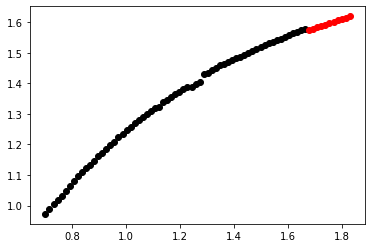

In [150]:

float_formatter = "{:.5f}".format
np.set_printoptions(formatter={'float_kind': float_formatter})

base = datetime.datetime(2020, 10, 19)
date_list = [(base + datetime.timedelta(days=x)).date() for x in range(11)]

final_dates = [(date_list[i] - datetime.date(2020,3,6) ).days for i in range(len(date_list))]


resultados_muerte = []

for i in range(len(date_list)):
    # Peru - muertes
    entrada_peru_muertes = data_peru[209].copy()
    entrada_peru_muertes = np.insert(entrada_peru_muertes, 0, 1, axis=0)
    entrada_peru_muertes[1] = (final_dates[i] - peru_mean[0])/peru_std[0]
    entrada_peru_muertes = np.delete(entrada_peru_muertes, 3)
    result_muertes = Prediccion(theta_peru_muertes[0], entrada_peru_muertes)*peru_std[2] + peru_mean[2]

    print('fecha:', date_list[i], 'muertes peru:', result_muertes)
    resultados_muerte.append(result_muertes)



import matplotlib.pyplot as plt

# print(peru_mean)
# print(peru_std)
final_dates.reverse()
graphic_dates = [(val - peru_mean[0])/peru_std[0] for val in final_dates]
graphic_prediction = [ (val - peru_mean[2])/ peru_std[2] for val in resultados_muerte]

print(graphic_dates[0:4])
print(graphic_prediction[0:4])
print(x_peru_muertes_test[-1,1])
print(y_peru_muertes_test[-1])
plt.scatter(x_peru_muertes_test[:65,1], y_peru_muertes_test[:65],  color='black')
plt.scatter(graphic_dates, graphic_prediction,  color='red')
# plt.plot(x_peru_confirmados_test_pred[:, 1], y_pred_1, color='blue', linewidth=1)

print('')
print('')
plt.show()
print('')
print('')

Text(0, 0.5, 'Costos')

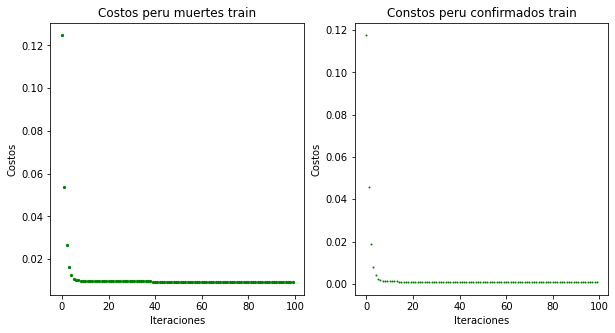

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(np.arange(100), costo_peru_muertes[:100], alpha = 1, c="green", s=5)
ax[0].set_title("Costos peru muertes train")
ax[0].set_xlabel('Iteraciones')
ax[0].set_ylabel('Costos')

ax[1].scatter(np.arange(100), costo_peru_confirmados[:100], alpha = 1, c="green", s=1)
ax[1].set_title("Costos peru confirmados train")
ax[1].set_xlabel('Iteraciones')
ax[1].set_ylabel('Costos')

(161, 6)
[[1.00000 1.58876 1.55080 1.64175 1.61867 1.79974]
 [1.00000 1.60381 1.55812 1.65818 1.63680 1.81009]
 [1.00000 1.61887 1.56324 1.67451 1.65499 1.82053]
 [1.00000 1.63393 1.56883 1.69119 1.67371 1.83006]
 [1.00000 1.64899 1.57308 1.70841 1.69271 1.84183]
 [1.00000 1.66405 1.57757 1.72534 1.71135 1.85359]
 [1.00000 1.67910 1.58237 1.73883 1.72646 1.86139]
 [1.00000 1.69416 1.58670 1.75390 1.74263 1.87052]
 [1.00000 1.70922 1.59159 1.77010 1.76067 1.88084]
 [1.00000 1.72428 1.59529 1.78643 1.77867 1.89116]]
fecha: 2020-10-19 confirmados: 849616.8939984373
fecha: 2020-10-20 confirmados: 853066.7429477928
fecha: 2020-10-21 confirmados: 856516.5918971482
fecha: 2020-10-22 confirmados: 859966.4408465032
fecha: 2020-10-23 confirmados: 863416.2897958581
fecha: 2020-10-24 confirmados: 866866.1387452136
fecha: 2020-10-25 confirmados: 870315.9876945687
fecha: 2020-10-26 confirmados: 873765.8366439238
fecha: 2020-10-27 confirmados: 877215.6855932791
fecha: 2020-10-28 confirmados: 880665.5

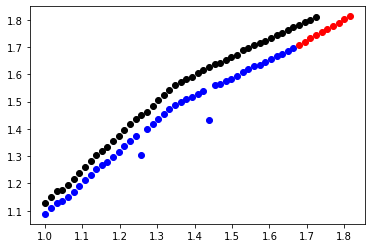

In [149]:
# Peru - confirmados
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_peru_confirmados_train_pred = x_peru_confirmados_train.copy()
x_peru_confirmados_test_pred = x_peru_confirmados_test.copy()

regr = linear_model.LinearRegression()
print(x_peru_confirmados_train_pred.shape)
regr.fit(x_peru_confirmados_train_pred, y_peru_confirmados_train)

float_formatter = "{:.5f}".format
np.set_printoptions(formatter={'float_kind': float_formatter})

base = datetime.datetime(2020, 10, 19)
date_list = [(base + datetime.timedelta(days=x)).date() for x in range(11)]

final_dates = [(date_list[i] - datetime.date(2020,3,6) ).days for i in range(len(date_list))]

x_pred_2 = x_peru_confirmados_test_pred.copy()
base_entry = x_peru_confirmados_test_pred[-5].copy()
x_pred_2 = x_pred_2[-10:]
print(x_pred_2)
for i in range(10):
    x_pred_2[i] = base_entry
    x_pred_2[i][1] = (final_dates[i] - peru_mean[0]) / peru_std[0]
    x_pred_2[i][2] += 0.012
    x_pred_2[i][3] += 0.012
    x_pred_2[i][4] += 0.012
    x_pred_2[i][5] += 0.012
    base_entry = x_pred_2[i]

y_pred_1 = regr.predict(x_pred_2)

y_pred_test = regr.predict(x_peru_confirmados_test_pred)

for i in range(len(y_pred_1)):
    print('fecha:', date_list[i], 'confirmados:', y_pred_1[i][0]*peru_std[1] + peru_mean[1])

plt.scatter(x_peru_confirmados_test_pred[20:,1], y_peru_confirmados_test[20:],  color='black')
plt.scatter(x_peru_confirmados_test_pred[20:65,1], y_pred_test[20:65], color='blue')
plt.scatter(x_pred_2[:, 1], y_pred_1, color='red')

print('')
print('')
plt.show()
print('')
print('')